# Mixture model - tests

In [1]:
import sys 
import os
sys.path.append(os.path.abspath("..")) # so we can find didson.py, multibeam.py

from glob import glob           # file manipulation
import numpy as np
from skimage.io import imread,imsave  # image processing
from scipy.optimize import curve_fit
from scipy.stats import *       # stats utils

from matplotlib import rcParams 
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Latin Modern Math']
# print rcParams['font.size']

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sonar import Sonar
from didson import Didson

didson = Didson();
didson.loadConfig('../data/DIDSON/didson.json')
print 'Pings are',didson.num_beams,'beams by',didson.num_bins, 'bins'
print 'Field of view:', didson.fov
print 'Range:', didson.min_range, ' - ', didson.max_range, 'm.'
print 'Noise:', didson.noise
print 'RX gain:', didson.rx_gain,'dB'

Pings are 96 beams by 512 bins
Field of view: 0.502654824574
Range: 2.25  -  11.25 m.
Noise: 0.002
RX gain: 20.0 dB


In [3]:
test_image_list = sorted(glob('../data/test/*.png')) # window set to 2.25m to 11.25m
test_config_list = sorted(glob('../data/test/*.json'))
print len(test_image_list),'image files,', len(test_config_list),'config files'

# for i in range(0,len(test_image_list)):
#     print(test_image_list[i])
#     print(test_config_list[i])
#     print(' ')

10 image files, 10 config files


In [4]:
import utils

0.0 1.0 eta: 47.4802633924
0.0 1.0 eta: 65.6085545904
0.0 1.0 eta: 63.2158349187
0.0 1.0 eta: 68.2475439709
0.0 1.0 eta: 87.7427299922
0.0 1.0 eta: 49.4185301521
0.0 1.0 eta: 14889780.75
0.0 1.0 eta: 13.2880793378
0.0 1.0 eta: 166.070643166
0.0 1.0 eta: 98.1463133791


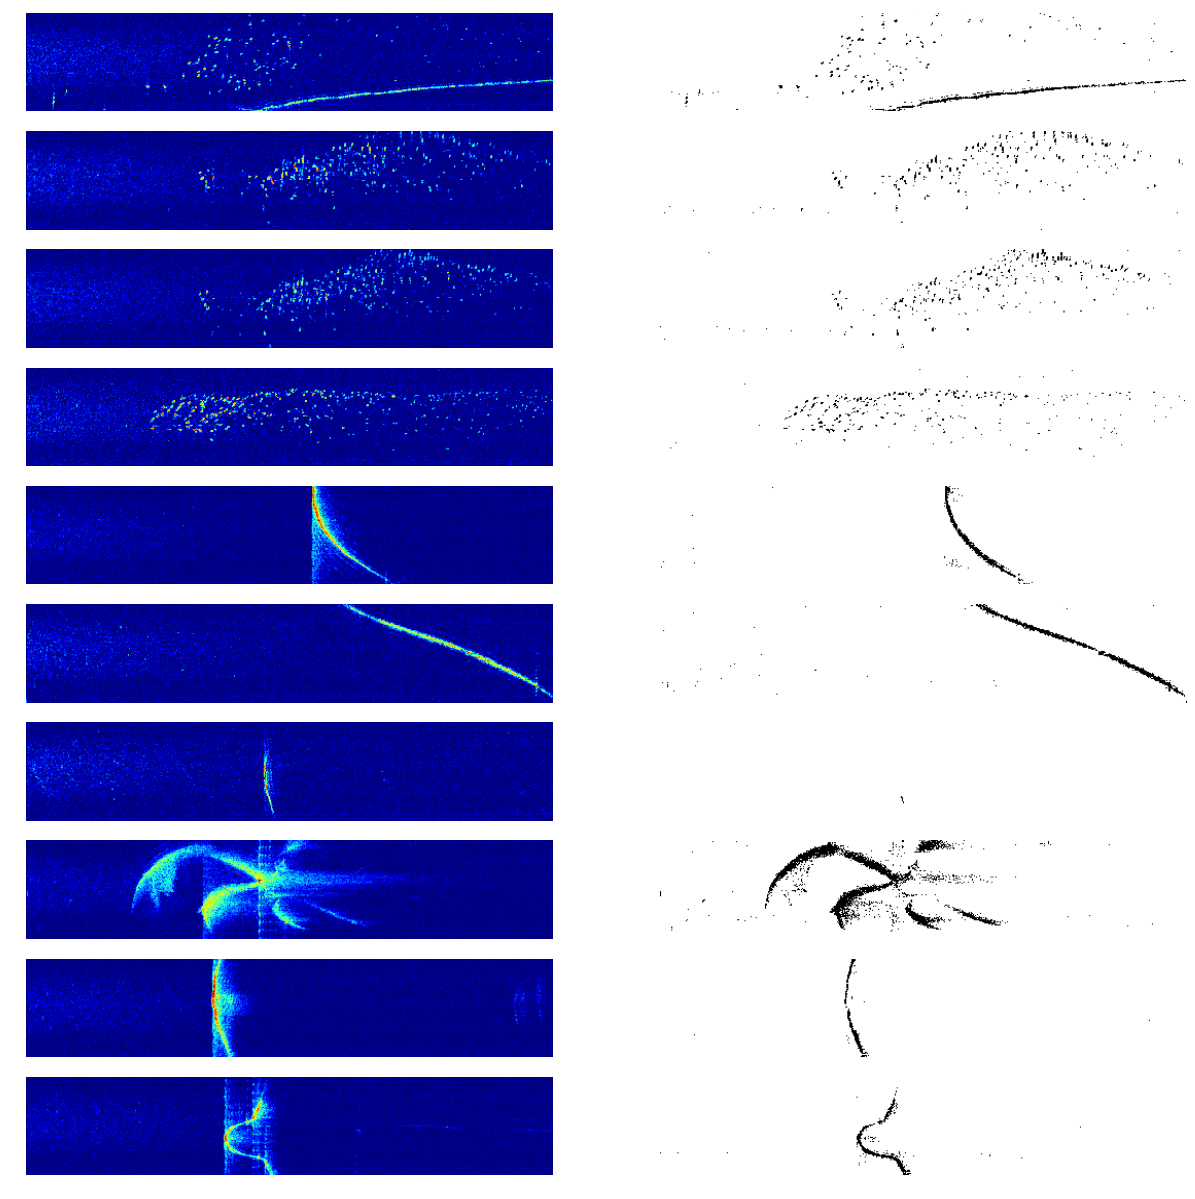

In [26]:
plt.figure(figsize=(15,15))
# cmap = plt.cm.jet
# norm = plt.Normalize(vmin=0.0, vmax=1.0)
rcParams['font.size'] = 6

# description=('shaft','rudder','hull','fish','propeller','hull','fish','fish','hull','fish, seafloor')
description=('fish, seafloor','fish','fish','fish','hull','hull','rudder','propeller','hull','hull')

for idx in range(0,len(test_image_list)):
    image = (1/255.0)*imread(test_image_list[idx],as_grey = True)
    didson.loadConfig(test_config_list[idx])
    didson.noise=0.001
    image_d = didson.deconvolve(image)
    image_d = didson.removeTaper(image_d)
    
    (p,k) = utils.getMixtureParameters(image_d)
#     print test_image_list[idx], p, 1e3*k
#     print idx,'&',description[idx],('& %.3f & %.3f & %.3f & %.3f & %.3f \\\\ \\hline' % ( p[0], 1.0/p[2], p[1], p[3], 1e3*k))

    mixture = utils.mixture_pmf(np.linspace(0,1.0,256),p[0],p[1],p[2],p[3])
    
#     plt.figure(figsize=(3,0.5))
#     plt.plot(np.linspace(0,1.0,256),mixture,color='#33a02c',alpha=0.8,linewidth=0.5)

#     hi = np.histogram(image_d.flatten(),np.linspace(0,1.0,257))
#     x = hi[1][:-1].astype(np.float64)
#     h = hi[0][:].astype(np.float64)
#     h /=(0.0+np.sum(h))

#     plt.plot(x,h,color='#1f78b4',alpha=0.8,linewidth=0.5)
    
#     x=np.linspace(0,1.0,256)

#     plt.xlim([0,1])
#     plt.ylim([1e-5,1e0])
#     if idx==9:
#         plt.xlabel('$y$')
#     plt.ylabel('$p_Y(y)$')    
#     plt.yscale('log')
#     plt.grid(linewidth=.2,linestyle='-',alpha=0.5)
#     ax = plt.gca()
#     for side in ('top','bottom','left','right'):
#         ax.spines[side].set_linewidth(0.2)
#     ax.tick_params(width=0.2)    
#     plt.minorticks_off()
#     plt.savefig('test_mixture_'+str(idx)+'.pdf',dpi=600,bbox_inches='tight',transparent=True,pad_inches=0.02) # no transparency on eps!

    image_likelihood = utils.likelihood(image_d, p[0],p[1],p[2],p[3])
    eta = (1-p[1])/p[1]
    img_bin = image_likelihood
    img_bin[img_bin<eta] = 1.0
    img_bin[img_bin>=eta] = 0.0
    print image_likelihood.min(), image_likelihood.max(),  'eta:',eta
    plt.subplot(10,2,2*idx+1)
    plt.imshow(image.transpose())
    plt.axis('off')
    
    img_out = (255*(img_bin.transpose()))
    imsave('map_'+str(idx)+'.png',img_out.astype(np.uint8))
    
    plt.subplot(10,2,2*idx+2)
    plt.imshow(img_bin.transpose(),cmap='gray')
    plt.axis('off')
    plt.tight_layout

In [6]:
../data/test/1468966347175925.png [ 0.30110998  0.01936547  0.01751426  0.13375461]
0.00261639391279
../data/test/1468966376377511.png [ 0.30855544  0.01290416  0.02470654  0.1597748 ]
0.00211714545465
../data/test/1468966376476216.png [ 0.30243361  0.01398022  0.02279021  0.14132517]
0.00207878002184
../data/test/1468966851909797.png [ 0.30115379  0.01349532  0.02538259  0.13983649]
0.00209886951519
../data/test/1468969086135548.png [ 0.30579632  0.01194032  0.0202088   0.18027693]
0.00300613588278
../data/test/1468970074505798.png [ 0.29783121  0.01875268  0.0127644   0.09484734]
0.00180305174718
../data/test/1468970271148135.png [  3.22137374e-01   2.45126260e-09   1.78507702e-02   9.99999973e-01]
0.00754712733759
../data/test/1468970485675274.png [ 0.2709387   0.09809799  0.0331402   0.13919279]
0.0131944397212
../data/test/1468970745714629.png [ 0.32081766  0.00944131  0.02675598  0.21525023]
0.00245114271509
../data/test/1468970832506128.png [ 0.31666886  0.0144619   0.02318888  0.17092262]
0.0032274341375


SyntaxError: invalid syntax (<ipython-input-6-15346eed8232>, line 1)